In [1]:
import numpy as np  # 数据结构
import sklearn.cluster as skc  # 密度聚类
from sklearn import metrics   # 评估模型
import matplotlib.pyplot as plt  # 可视化绘图

data=[
    [-2.68420713,1.469732895],[-2.71539062,-0.763005825],[-2.88981954,-0.618055245],[-2.7464372,-1.40005944],[-2.72859298,1.50266052],
    [-2.27989736,3.365022195],[-2.82089068,-0.369470295],[-2.62648199,0.766824075],[-2.88795857,-2.568591135],[-2.67384469,-0.48011265],
    [-2.50652679,2.933707545],[-2.61314272,0.096842835],[-2.78743398,-1.024830855],[-3.22520045,-2.264759595],[-2.64354322,5.33787705],
    [-2.38386932,6.05139453],[-2.6225262,3.681403515],[-2.64832273,1.436115015],[-2.19907796,3.956598405],[-2.58734619,2.34213138],
    [1.28479459,3.084476355],[0.93241075,1.436391405],[1.46406132,2.268854235],[0.18096721,-3.71521773],[1.08713449,0.339256755],
    [0.64043675,-1.87795566],[1.09522371,1.277510445],[-0.75146714,-4.504983795],[1.04329778,1.030306095],[-0.01019007,-3.242586915],
    [-0.5110862,-5.681213775],[0.51109806,-0.460278495],[0.26233576,-2.46551985],[0.98404455,-0.55962189],[-0.174864,-1.133170065],
    [0.92757294,2.107062945],[0.65959279,-1.583893305],[0.23454059,-1.493648235],[0.94236171,-2.43820017],[0.0432464,-2.616702525],
    [4.53172698,-0.05329008],[3.41407223,-2.58716277],[4.61648461,1.538708805],[3.97081495,-0.815065605],[4.34975798,-0.188471475],
    [5.39687992,2.462256225],[2.51938325,-5.361082605],[4.9320051,1.585696545],[4.31967279,-1.104966765],[4.91813423,3.511712835],
    [3.66193495,1.0891728],[3.80234045,-0.972695745],[4.16537886,0.96876126],[3.34459422,-3.493869435],[3.5852673,-2.426881725],
    [3.90474358,0.534685455],[3.94924878,0.18328617],[5.48876538,5.27195043],[5.79468686,1.139695065],[3.29832982,-3.42456273]
]
X = np.array(data)

In [4]:
db = skc.DBSCAN(eps=1.5, min_samples=3).fit(X) #DBSCAN聚类方法 还有参数，matric = ""距离计算方法
labels = db.labels_  #和X同一个维度，labels对应索引序号的值 为她所在簇的序号。若簇编号为-1，表示为噪声

print('每个样本的簇标号:')
print(labels,len(labels))


每个样本的簇标号:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2 -1  2
  2  2  2  2  2  2  2  2  2 -1  2  2] 60


In [5]:
raito = len(labels[labels[:] == -1]) / len(labels)  #计算噪声点个数占总数的比例
print('噪声比:', format(raito, '.2%'))

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # 获取分簇的数目

print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(X, labels)) #轮廓系数评价聚类的好坏

噪声比: 3.33%
分簇的数目: 3
轮廓系数: 0.372


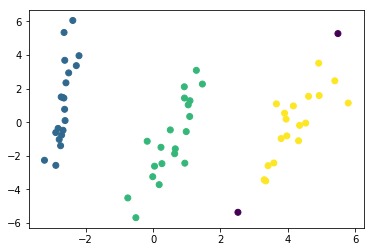

In [25]:
for i in range(n_clusters_):
    #print('簇 ', i, '的所有样本:')
    one_cluster = X[labels == i]
    #print(one_cluster)
    #plt.plot(one_cluster[:,0],one_cluster[:,1],'o')
plt.scatter([i[0] for i in data],[i[1] for i in data],c= labels)
plt.show()

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
def transform(dataset, n_features):
    """
    :param n_features: 从文档中提取出tfidf值排名前n_features的单词
                       将每篇文档都表示成n_features的向量，如不含该词则对应的值为0；
    """
    vectorizer = TfidfVectorizer(max_df=100, max_features=n_features, min_df=10, use_idf=True,
                                 dtype=float)
    X = vectorizer.fit_transform(dataset)
    # print(X.shape)
    # vectorizer.get_feature_names()返回满足结果的前n_features个词;
    # print(vectorizer.get_feature_names())

    return X, vectorizer

In [56]:
data = pd.read_csv('context.csv',encoding='gbk',index_col=0)
dataset = data['data']
X,vectorizer = transform(dataset,n_features=500)

E:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [85]:
db = skc.DBSCAN(eps=0.5, min_samples=10).fit(X)
# eps为最大距离，min_samples为每个节点中包含的样本数目
labels = db.labels_  #和X同一个维度，labels对应索引序号的值 为她所在簇的序号。若簇编号为-1，表示为噪声

# # print('每个样本的簇标号:')

In [86]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  8,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2, -1, -1, -1, -1

In [87]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [89]:

for i in set(labels):
    print('簇 ', i, '的所有样本:')
    one_cluster = X[labels == i]
    print(one_cluster)
    #plt.plot(one_cluster[:,0],one_cluster[:,1],'o')
    

簇  0 的所有样本:
  (0, 88)	0.27318987810467366
  (0, 10)	0.287937101648998
  (0, 121)	0.2830434078425846
  (0, 400)	0.3626004773304266
  (0, 257)	0.3164899476195594
  (0, 389)	0.3429541939635179
  (0, 145)	0.3818856970801572
  (0, 458)	0.3238981752071261
  (0, 362)	0.40291023748898463
  (1, 88)	0.2619253920831887
  (1, 10)	0.2760645407799995
  (1, 121)	0.2713726295061536
  (1, 400)	0.3476493084342373
  (1, 464)	0.28419390398880656
  (1, 257)	0.30344006225911047
  (1, 389)	0.32881310370529293
  (1, 145)	0.3661393373452763
  (1, 458)	0.3105428251029499
  (1, 362)	0.38629696920248957
  (2, 88)	0.27318987810467366
  (2, 10)	0.287937101648998
  (2, 121)	0.2830434078425846
  (2, 400)	0.3626004773304266
  (2, 257)	0.3164899476195594
  (2, 389)	0.3429541939635179
  :	:
  (9, 121)	0.2830434078425846
  (9, 400)	0.3626004773304266
  (9, 257)	0.3164899476195594
  (9, 389)	0.3429541939635179
  (9, 145)	0.3818856970801572
  (9, 458)	0.3238981752071261
  (9, 362)	0.40291023748898463
  (10, 88)	0.273189878